In [1]:
import pandas as pd

# Data awal
sayur = {'suka_sayur': [6, 8, 10, 14, 18],
         'rentang_umur': [10, 20, 30, 40, 50]}

# Membuat DataFrame
sayur_df = pd.DataFrame(sayur)

# Menampilkan DataFrame
sayur_df

,suka_sayur,rentang_umur
0,6,10
1,8,20
2,10,30
3,14,40
4,18,50


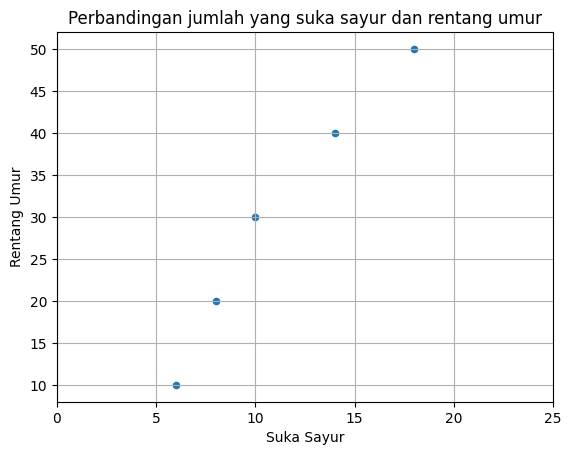

In [48]:
import matplotlib.pyplot as plt

sayur_df.plot(kind='scatter', x='suka_sayur', y='rentang_umur')

plt.title('Perbandingan jumlah yang suka sayur dan rentang umur')
plt.xlabel('Suka Sayur')
plt.ylabel('Rentang Umur')
plt.xlim(0, 25)
plt.grid(True)
plt.show()

In [49]:
import numpy as np

x = np.array(sayur_df['suka_sayur'])
y = np.array(sayur_df['rentang_umur'])

print(f'x: {x}')
print(f'y: {y}')

x: [ 6  8 10 14 18]
y: [10 20 30 40 50]


In [50]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [51]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [53]:
x_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(x_vis)

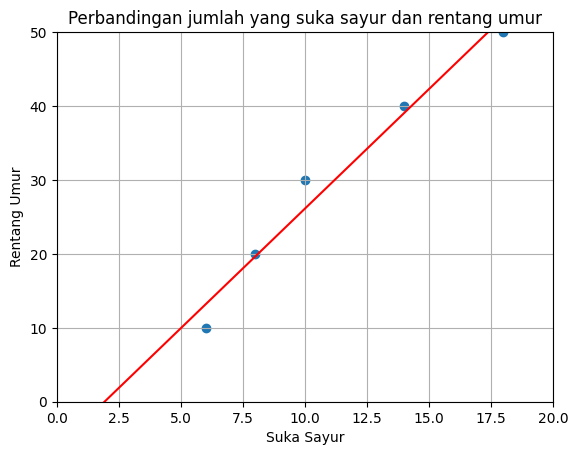

In [54]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, "-r")

plt.title('Perbandingan jumlah yang suka sayur dan rentang umur')
plt.xlabel('Suka Sayur')
plt.ylabel('Rentang Umur')
plt.xlim(0, 20)
plt.ylim(0, 50)
plt.grid(True)
plt.show()

In [55]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: -6.206896551724128
slope: [3.23275862]


In [56]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y: {y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten: [ 6  8 10 14 18]

y: [10 20 30 40 50]


In [57]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


In [58]:
np.cov(x.flatten(), y)

array([[ 23.2,  75. ],
       [ 75. , 250. ]])

In [59]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 75.0


In [60]:
slope = covariance_xy / variance_x

In [61]:
intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intercept}')

intercept: -6.206896551724135


In [62]:
suka_sayur = np.array([12, 20, 23]).reshape(-1, 1)
suka_sayur

array([[12],
       [20],
       [23]])

In [66]:
prediksi_umur = model.predict(suka_sayur)
prediksi_umur 

array([32.5862069 , 58.44827586, 68.14655172])

In [67]:
for suka, hrg in zip(suka_sayur, prediksi_umur):
    print(f'Suka Sayur: {suka}, Prediksi Rentang Umur: {hrg}')

Suka Sayur: [12], Prediksi Rentang Umur: 32.58620689655172
Suka Sayur: [20], Prediksi Rentang Umur: 58.448275862068954
Suka Sayur: [23], Prediksi Rentang Umur: 68.14655172413792


In [68]:
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

x_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

In [69]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


In [72]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2 
             for x_i, y_i in zip(x_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [73]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [74]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
